The dataset is too large to storage directly in the Github resppsitory (481 MB) please download it from the link below :
[Download Dataset from Google drive]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [3]:
df = pd.read_csv('AIML Dataset.csv')

In [4]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.shape

(6362620, 11)

In [7]:
df['isFraud'].value_counts(),df['isFlaggedFraud'].value_counts()

(isFraud
 0    6354407
 1       8213
 Name: count, dtype: int64,
 isFlaggedFraud
 0    6362604
 1         16
 Name: count, dtype: int64)

In [8]:
df.isnull().sum().sum()

np.int64(0)

In [9]:
print(round(df['isFraud'].value_counts()[1]/df.shape[0] * 100, 2),"%")

0.13 %


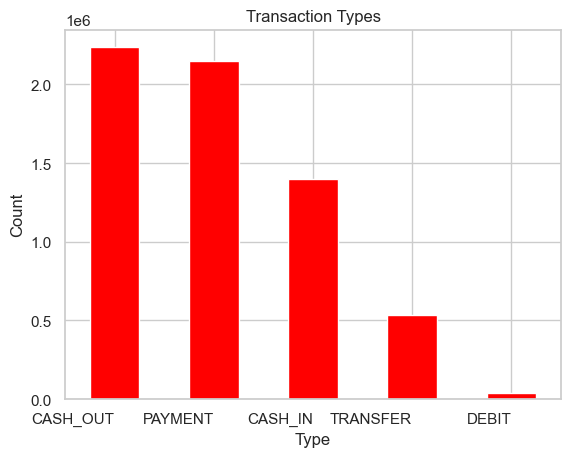

In [10]:
df.type.value_counts().plot(kind='bar', title='Transaction Types', color='red')
plt.xlabel('Type')
plt.xticks(rotation = 0 , ha='right')
plt.ylabel('Count')
plt.show()

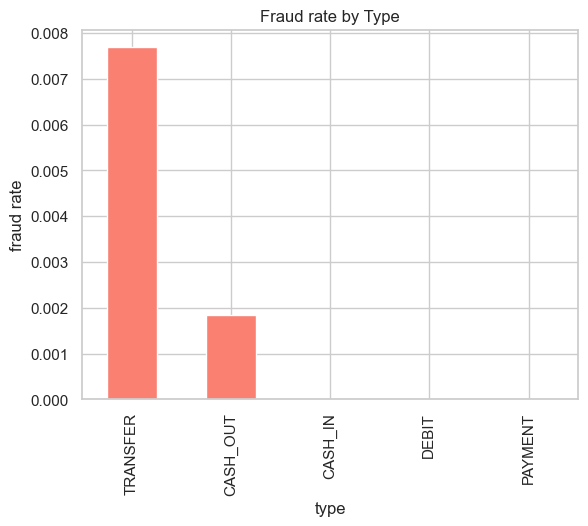

In [11]:
fraudByType = df.groupby('type')['isFraud'].mean().sort_values(ascending=False)
fraudByType.plot(kind='bar', title='Fraud rate by Type', color='salmon')
plt.xlabel('type')
plt.ylabel('fraud rate')
plt.show()

In [12]:
df.amount.describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

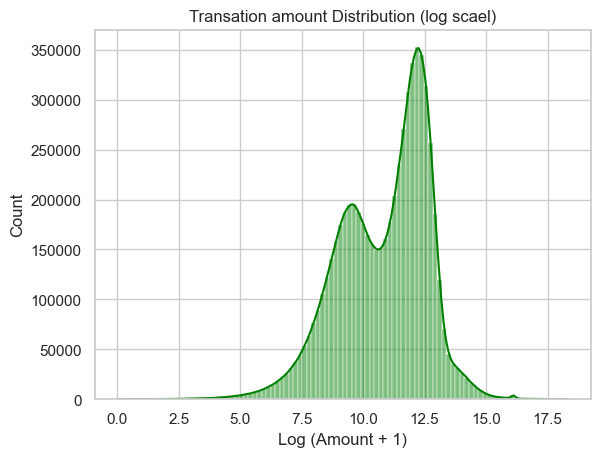

In [13]:
sns.histplot(np.log1p(df['amount']), kde=True, bins=100, color='green')
plt.title('Transation amount Distribution (log scael)')
plt.xlabel('Log (Amount + 1)')
plt.show()

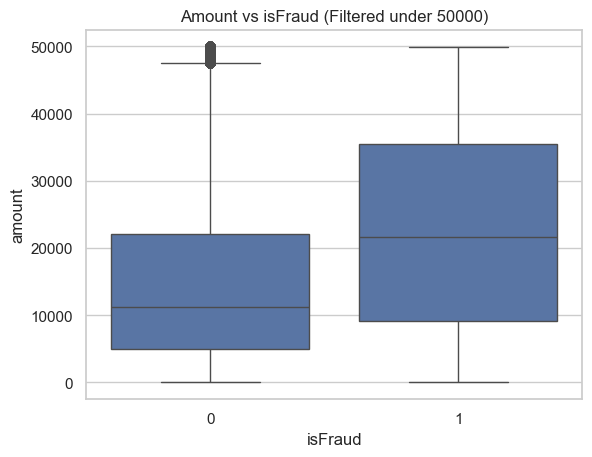

In [14]:
sns.boxplot(data=df[df['amount']<50000], x='isFraud', y='amount')
plt.title('Amount vs isFraud (Filtered under 50000)')
plt.show()

In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [16]:
df['balancedOrg'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balancedDest'] = df['newbalanceDest'] - df['oldbalanceDest']

In [17]:
(df['balancedOrg']<0).sum(), (df['balancedDest']<0).sum()

(np.int64(1399253), np.int64(1238864))

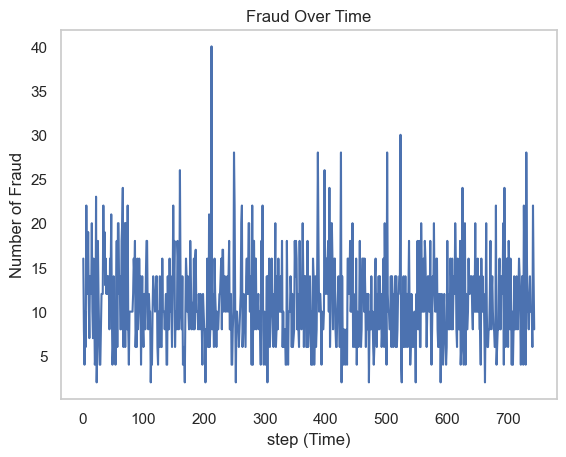

In [18]:
fraudByStep = df[df['isFraud']==1]['step'].value_counts().sort_index()
plt.plot(fraudByStep.index, fraudByStep.values, label='Fraud by steps')
plt.xlabel('step (Time)')
plt.ylabel('Number of Fraud')
plt.title('Fraud Over Time')
plt.grid()
plt.show()

In [19]:
df.drop(columns='step', axis=1, inplace=True)

In [20]:
"top senders : ",df['nameOrig'].value_counts().head(10)

('top senders : ',
 nameOrig
 C1677795071    3
 C1999539787    3
 C724452879     3
 C1976208114    3
 C400299098     3
 C1784010646    3
 C1530544995    3
 C1065307291    3
 C545315117     3
 C1902386530    3
 Name: count, dtype: int64)

In [21]:
"top receivers : ", df['nameDest'].value_counts().head(10)

('top receivers : ',
 nameDest
 C1286084959    113
 C985934102     109
 C665576141     105
 C2083562754    102
 C248609774     101
 C1590550415    101
 C1789550256     99
 C451111351      99
 C1360767589     98
 C1023714065     97
 Name: count, dtype: int64)

In [22]:
print(f"name frauder {df[df['isFraud']==1]['nameOrig'].value_counts().head(10)}")

name frauder nameOrig
C1280323807    1
C1305486145    1
C840083671     1
C1420196421    1
C2101527076    1
C1039979813    1
C2089752665    1
C1614818636    1
C40604503      1
C1970706589    1
Name: count, dtype: int64


In [23]:
print(f"name frauder {df[df['isFraud']==1]['nameDest'].value_counts().head(10)}")

name frauder nameDest
C967226405     2
C1601170327    2
C650699445     2
C105660024     2
C1981613973    2
C803116137     2
C505532836     2
C964377943     2
C200064275     2
C1259079602    2
Name: count, dtype: int64


In [24]:
fraudType = df[df['type'].isin(['TRANSFER','CASH_OUT'])]

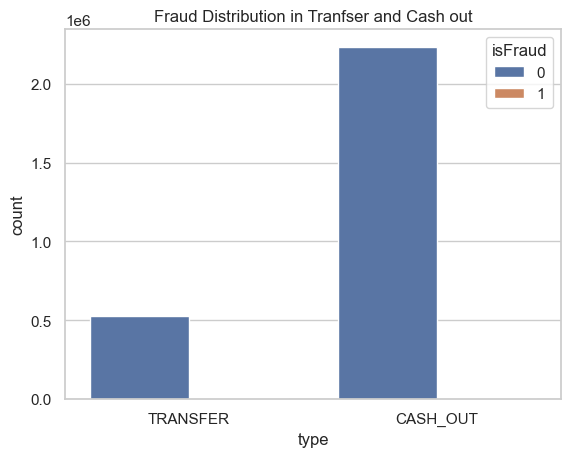

In [25]:
sns.countplot(data=fraudType, x='type', hue='isFraud')
plt.title('Fraud Distribution in Tranfser and Cash out')
plt.show()

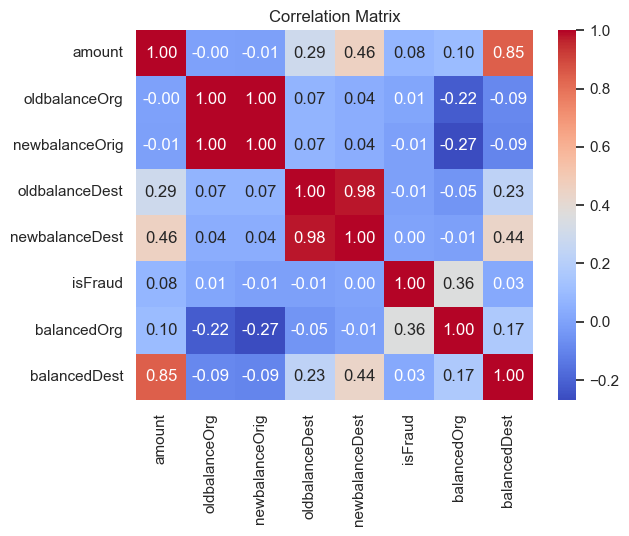

In [26]:
sns.heatmap(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','isFraud','balancedOrg','balancedDest']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [27]:
zero_after_transfer = df[
    (df['oldbalanceOrg']>0)&
    (df['newbalanceOrig']==0)&
    (df['type'].isin(['TRANSFER','CASH_OUT']))]

In [28]:
len(zero_after_transfer)

1188074

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [30]:
df.columns


Index(['type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud', 'balancedOrg', 'balancedDest'],
      dtype='object')

In [31]:
df = df.drop(columns=['nameOrig','nameDest','isFlaggedFraud'], axis=1)

In [32]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balancedOrg,balancedDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [33]:
categorical = ['type']
numeric = ['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

In [34]:
y = df['isFraud']
X = df.drop('isFraud', axis=1)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [180]:
preprocessor = ColumnTransformer(
    transformers=[
        ('number', StandardScaler(), numeric),
        ('category', OneHotEncoder(), categorical)
    ],
    remainder='drop'
)

In [99]:
df.shape

(6362620, 9)

In [178]:
pipeline = Pipeline([
    ('prep', preprocessor),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

In [40]:
pipeline.fit(X_train, y_train)

,steps,"[('prep', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('number', ...), ('category', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [41]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

In [42]:
y_proba = pipeline.predict_proba(X_test)[:,1]
precision, recalls, threshold = precision_recall_curve(y_test, y_proba)

In [43]:
for p,r,t in zip(precision, recalls, threshold):
    if p>=0.02 and r >= 70 :
        print(f"precision :     {p} recal:{r}   threshold:{t}")

In [44]:
y_pred = pipeline.predict(X_test)

In [45]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.94      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [175]:
from xgboost import XGBClassifier

In [174]:
ratio = (y_train==0).sum()/(y_train==1).sum()
print(f"{ratio:.2f}:1")

773.71:1


In [183]:
model = Pipeline([
        ('prep', preprocessor),
        ('xgb',XGBClassifier(scale_pos_weight = ratio,
                      n_estimators = 200,
                      learning_rate = 0.1,
                      max_depth=6,
                      subsample=0.8,
                      colsample_bytree = 0.8,
                      random_state =42,
                      n_jobs=-1))
])

model.fit(X_train,y_train)
y_prob = model.predict_proba(X_test)[:,1]
y_pred = (y_prob>0.7).astype(int)

In [184]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.42      0.99      0.58      2464

    accuracy                           1.00   1908786
   macro avg       0.71      0.99      0.79   1908786
weighted avg       1.00      1.00      1.00   1908786



In [187]:
model.score(X_test, y_test)

0.9974690719651129

In [48]:
import joblib

# joblib.dump(pipeline, 'fraud detection system.pkl')